# 3D Printer DataSet for Mechanical Engineers

Import Data

In [1]:
import statsmodels
import numpy as np
import pandas as pd
import pandashelpers
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from scipy.optimize import rosen, differential_evolution
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

/home/thom/.local/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
plt.rcParams.update({'font.size': 22})

In [3]:
data = pd.read_csv("data.csv").clean_column_names()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
layer_height          50 non-null float64
wall_thickness        50 non-null int64
infill_density        50 non-null int64
infill_pattern        50 non-null object
nozzle_temperature    50 non-null int64
bed_temperature       50 non-null int64
print_speed           50 non-null int64
material              50 non-null object
fan_speed             50 non-null int64
roughness             50 non-null int64
tension_strength      50 non-null int64
elongation            50 non-null float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


In [5]:
for column in data.columns:
    print(column)
    print(np.sort(data[column].unique()))

layer_height
[0.02 0.06 0.1  0.15 0.2 ]
wall_thickness
[ 1  2  3  4  5  6  7  8  9 10]
infill_density
[10 20 30 40 50 60 70 80 90]
infill_pattern
['grid' 'honeycomb']
nozzle_temperature
[200 205 210 215 220 225 230 240 250]
bed_temperature
[60 65 70 75 80]
print_speed
[ 40  60 120]
material
['abs' 'pla']
fan_speed
[  0  25  50  75 100]
roughness
[ 21  24  25  30  32  40  55  60  68  74  75  88  92 118 120 121 126 128
 138 144 145 154 163 168 172 176 180 192 200 212 220 225 244 265 276 278
 289 298 312 321 326 357 360 368]
tension_strength
[ 4  5  8  9 10 11 12 13 14 16 18 19 21 22 23 24 25 26 27 28 29 30 33 34
 35 37]
elongation
[0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2.  2.1
 2.2 2.3 2.4 2.7 2.8 2.9 3.1 3.2 3.3]


In [6]:
important_features = ['layer_height',
                      'infill_density',
                      'nozzle_temperature',
                      'wall_thickness'
                     ]

In [7]:
y = data[data.columns.intersection(['tension_strength'])]
#x = data[data.columns.difference(['tension_strength','elongation','roughness'])]
x = data[important_features]
x_numeric=x.select_dtypes(include=np.number)
x_nonnumeric=x.select_dtypes(exclude=np.number)
#x = pd.get_dummies(x_nonnumeric).join(x_numeric)

In [8]:
print(x.columns)

Index(['layer_height', 'infill_density', 'nozzle_temperature',
       'wall_thickness'],
      dtype='object')


In [9]:
strength_regressor_rf = RandomForestRegressor()
strength_regressor_rf.fit(x,y.values.reshape(-1))

strength_regressor_linear = LinearRegression()
strength_regressor_linear.fit(x,y.values.reshape(-1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
feature_importance = pd.concat([pd.Series(strength_regressor_rf.feature_importances_,name='importance'),
                                pd.Series(x.columns,name='feature')
                               ],axis=1
                              ).sort_values('importance')

Text(0.5,1,'Tensile Strength')

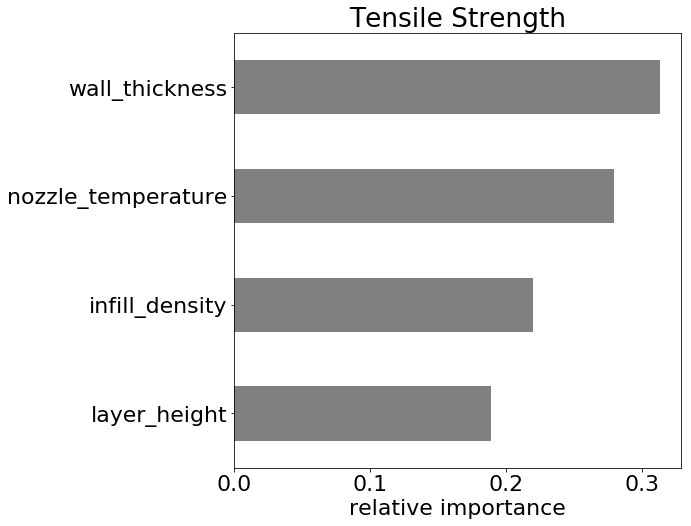

In [11]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,8))
feature_importance.plot.barh(x='feature',
                             y='importance',
                             color='grey',
                             legend=False,
                             ax = ax
                             )
ax.set_xlabel('relative importance')
ax.set_ylabel('')
ax.set_title('Tensile Strength')

In [12]:
feature_importance['feature']

0          layer_height
1        infill_density
2    nozzle_temperature
3        wall_thickness
Name: feature, dtype: object

In [13]:
#sns.pairplot(x.join(y))
#sns.heatmap(np.corrcoef(x.join(y)))

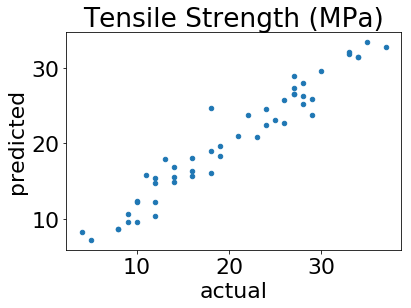

In [14]:
strength_predicted = pd.Series(strength_regressor_rf.predict(x),name='predicted')
strength_actual = pd.Series(y.values.reshape(-1),name='actual')
strength_residual = strength_actual - strength_predicted
pd.concat([strength_predicted,
           strength_actual]
          ,axis=1
         ).plot.scatter(x='actual',y='predicted',title='Tensile Strength (MPa)')

In [15]:
strength_residual.name = 'residual'

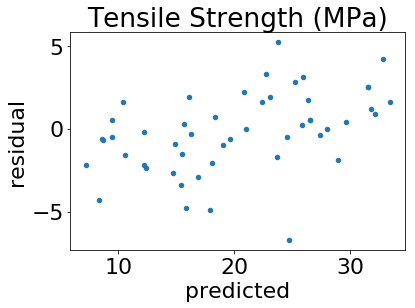

In [16]:
pd.concat([strength_predicted,
           strength_residual]
          ,axis=1
         ).plot.scatter(x='predicted',y='residual',title='Tensile Strength (MPa)')

In [17]:
np.sqrt(sklearn.metrics.mean_squared_error(y_true=strength_actual,
                                           y_pred=strength_predicted
                                          )
       )

2.3857493581682045

((array([-2.20385432, -1.83293478, -1.61402323, -1.45296849, -1.32267759,
         -1.21163342, -1.113805  , -1.02561527, -0.94475674, -0.86964726,
         -0.79915021, -0.73241807, -0.66879925, -0.6077796 , -0.54894415,
         -0.49195112, -0.43651377, -0.38238727, -0.32935914, -0.27724191,
         -0.2258675 , -0.17508277, -0.12474591, -0.07472335, -0.02488719,
          0.02488719,  0.07472335,  0.12474591,  0.17508277,  0.2258675 ,
          0.27724191,  0.32935914,  0.38238727,  0.43651377,  0.49195112,
          0.54894415,  0.6077796 ,  0.66879925,  0.73241807,  0.79915021,
          0.86964726,  0.94475674,  1.02561527,  1.113805  ,  1.21163342,
          1.32267759,  1.45296849,  1.61402323,  1.83293478,  2.20385432]),
  array([-6.7, -4.9, -4.8, -4.3, -3.4, -2.9, -2.7, -2.4, -2.2, -2.2, -2.1,
         -1.9, -1.7, -1.6, -1.5, -1. , -0.9, -0.7, -0.6, -0.6, -0.5, -0.5,
         -0.4, -0.3, -0.2,  0. ,  0. ,  0.2,  0.3,  0.4,  0.5,  0.5,  0.5,
          0.7,  0.9,  1.2,  1.6, 

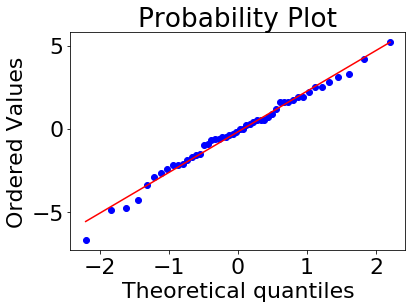

In [18]:
stats.probplot(strength_residual, dist="norm", plot=plt)

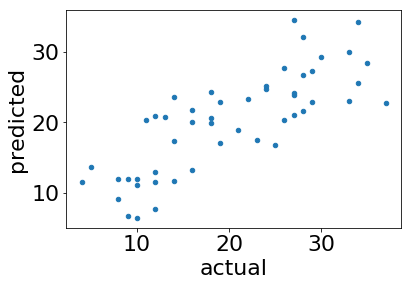

In [19]:
pd.concat([pd.Series(strength_regressor_linear.predict(x),name='predicted'),
           pd.Series(y.values.reshape(-1),name='actual')
          ],axis=1
         ).plot.scatter(x='actual',y='predicted')

In [20]:
metadata = pd.read_csv('metadata.csv')

In [21]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Columns: 145 entries, Unnamed: 0 to z_offset 
dtypes: float64(19), int64(102), object(24)
memory usage: 870.1+ KB


In [22]:
metadata.columns

Index(['Unnamed: 0', '--fill-angle', '--fill-density', '--fill-pattern',
       '--infill-every-layers', '--layer-height', '--perimeters',
       '--solid-infill-speed', '--solid-layers', '--temperature',
       ...
       'top_solid_infill_speed ', 'top_solid_layers ', 'travel_speed ',
       'use_firmware_retraction ', 'use_relative_e_distances ',
       'use_volumetric_e ', 'vibration_limit ', 'wipe ',
       'xy_size_compensation ', 'z_offset '],
      dtype='object', length=145)

In [23]:
strenth_controllable_parameters = ['--layer-height', # layer_height
                                   '--fill-density', # infill_density
                                   '--temperature', # nozzle_temperature
                                   '--solid-layers' # wall_thickness
                                  ]



In [24]:
newx = metadata[strenth_controllable_parameters]
newx.columns

Index(['--layer-height', '--fill-density', '--temperature', '--solid-layers'], dtype='object')

In [25]:
#sns.pairplot(newx)

In [26]:
tensile = strength_regressor_rf.predict(newx)
tensile_series = pd.Series(tensile,name='tensile_strength_predicted')

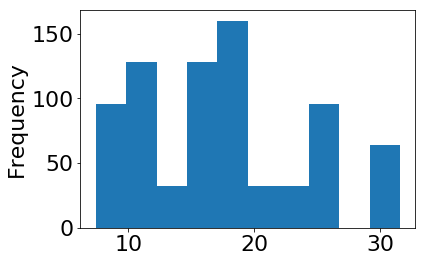

In [27]:
tensile_series.plot.hist()

In [28]:
metadata_enriched = metadata.join(tensile_series)

In [29]:
filament = metadata['filament used '].str.strip(' ')\
                                    .str.split(' ',expand=True)\
                                    .rename(columns={0:'filament_used_mm',
                                                     1:'filament_used_cm3'
                                                    }
                                           )


In [30]:
metadata_enriched['filament_used_mm'] = filament['filament_used_mm']\
.str.replace('mm','')\
.apply(float)

metadata_enriched['filament_used_cm3'] = filament['filament_used_cm3']\
.str.strip('()')\
.str.replace('cm3','')                                                             .apply(float)

In [31]:
metadata_enriched['infill extrusion width (mm)'] = metadata['infill extrusion width '].str.replace('mm','').apply(float)

/home/thom/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(97.2697,0.5,'tensile strength (MPa)')

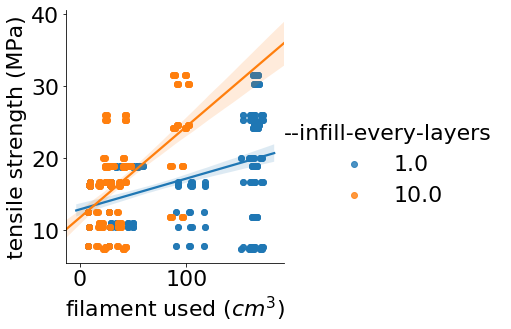

In [32]:
fg = sns.lmplot(x='filament_used_cm3',
                y='tensile_strength_predicted',
                hue='--infill-every-layers',
                #col='--fill-density',
                #row='--layer-height',
                data=metadata_enriched           
          )
fg.axes[0,0].set_xlabel('filament used ($cm^3$)')
fg.axes[0,0].set_ylabel('tensile strength (MPa)')

In [33]:
filament_controllable_parameters = ['--infill-every-layers',
                                    '--fill-density',
                                    '--layer-height',                                    
                                   ]

In [34]:
#metadata[]
y = metadata_enriched[metadata_enriched.columns.intersection(['filament_used_cm3'])]
"""
x = metadata_enriched[metadata_enriched.columns.difference(['filament_used_cm3',
                                                            'filament used ',
                                                            'filament_used_mm',
                                                            'Unnamed: 0',
                                                            'fill_density ',
                                                            'infill_every_layers ',
                                                            'output_filename_format ',
                                                            'fill_pattern ',
                                                            'layer_height ',
                                                            'perimeters ',                                                            
                                                           ])]
x_numeric = x.select_dtypes(include=np.number)
x_non_numeric = x.select_dtypes(exclude=np.number)
x = pd.get_dummies(x_non_numeric).join(x_numeric)
x = x.loc[:,x.var()!=0].dropna(1)
"""
x = metadata_enriched[filament_controllable_parameters]

In [35]:
x.columns

Index(['--infill-every-layers', '--fill-density', '--layer-height'], dtype='object')

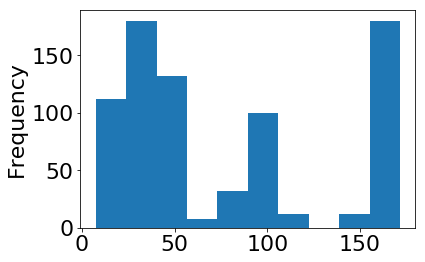

In [36]:
y.plot.hist(legend=False)

In [37]:
filament_regressor_rf = RandomForestRegressor()
filament_regressor_linear = LinearRegression()

In [38]:
filament_regressor_rf.fit(x,y.values.reshape(-1))
#filament_regressor_linear.fit(x_numeric.dropna(1),y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [39]:
feature_importance = pd.concat([pd.Series(filament_regressor_rf.feature_importances_,name='importance'),
                                pd.Series(x.columns,name='feature')
                               ],axis=1
                              ).sort_values('importance')

In [40]:
feature_importance.dropna()

,importance,feature
2,0.082963,--layer-height
0,0.445008,--infill-every-layers
1,0.472028,--fill-density


Text(0.5,1,'Filament Usage')

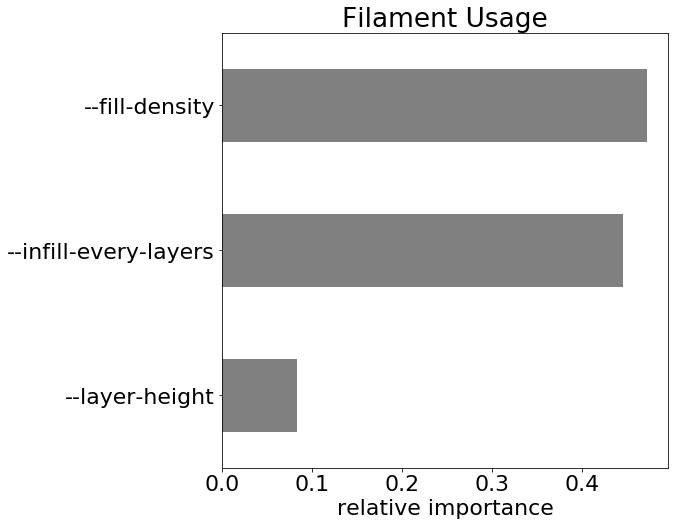

In [41]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(8,8))

feature_importance.dropna()[-10:].plot.barh(x='feature',
                                            y='importance',
                                            color='grey',
                                            legend=False,
                                            ax=ax
                                           )


ax.set_xlabel('relative importance')
ax.set_ylabel('')
ax.set_title('Filament Usage')

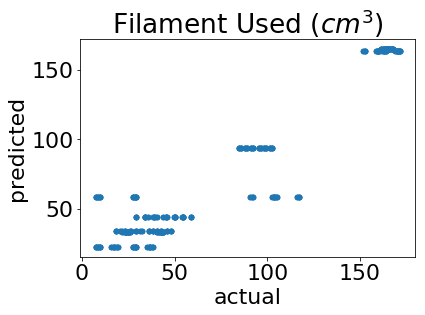

In [42]:
filament_predicted = pd.Series(filament_regressor_rf.predict(x),name='predicted')
filament_actual = pd.Series(y.values.reshape(-1),name='actual')
filament_residual = filament_actual - filament_predicted 
filament_residual.name = 'residual'
pd.concat([filament_predicted,filament_actual],axis=1)\
    .plot.scatter(x='actual',y='predicted',title='Filament Used ($cm^3$)')

In [43]:
np.sqrt(sklearn.metrics.mean_squared_error(y_pred=filament_predicted,y_true=filament_actual))

17.230271299487182

((array([-2.46203784, -2.12570747, -1.93122778, -1.79044653, -1.67819304,
         -1.58381122, -1.50174123, -1.42869743, -1.36256869, -1.30191411,
         -1.24570419, -1.19317644, -1.14374949, -1.09696931, -1.05247413,
         -1.00997067, -0.96921765, -0.93001393, -0.89218993, -0.85560121,
         -0.82012357, -0.78564937, -0.75208458, -0.71934648, -0.68736185,
         -0.65606548, -0.62539893, -0.59530962, -0.56574992, -0.53667655,
         -0.50804994, -0.47983378, -0.45199463, -0.42450149, -0.39732558,
         -0.37044003, -0.34381966, -0.31744076, -0.29128096, -0.26531902,
         -0.23953472, -0.21390872, -0.18842244, -0.16305799, -0.13779803,
         -0.1126257 , -0.08752455, -0.06247843, -0.03747145, -0.01248789,
          0.01248789,  0.03747145,  0.06247843,  0.08752455,  0.1126257 ,
          0.13779803,  0.16305799,  0.18842244,  0.21390872,  0.23953472,
          0.26531902,  0.29128096,  0.31744076,  0.34381966,  0.37044003,
          0.39732558,  0.42450149,  0.

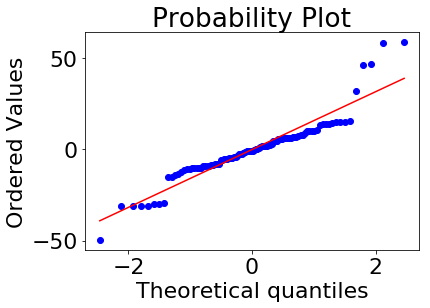

In [44]:
stats.probplot(filament_residual.sample(n=100), dist="norm", plot=plt)

In [45]:
average_filament = metadata_enriched['filament_used_cm3'].mean()
average_strength = metadata_enriched['tensile_strength_predicted'].mean()

In [57]:
def cost_function(input_array):
    """
    layer_height,
    fill_densiy,
    infill_every_layers,
    wall_thickness,
    nozzle_temperature
    """
    (layer_height,
     fill_densiy,
     infill_every_layers,
     wall_thickness,
     nozzle_temperature) = input_array
    
    x_strength = pd.Series({'layer_height':layer_height,
                            'fill_densiy':fill_densiy,
                            'wall_thickness':wall_thickness,
                            'nozzle_temperature':nozzle_temperature}
                          )
    
    x_filament = pd.Series({'layer_height':layer_height,
                            'fill_densiy':fill_densiy,
                            'infill_every_layers':infill_every_layers,                  
                           })
    
    
    strength = strength_regressor_rf.predict(x_strength.values.reshape(1, -1))
    filament = filament_regressor_rf.predict(x_filament.values.reshape(1, -1))       
    cost = 0.5*filament/average_filament - 0.5*strength/average_strength

    global iteration
    global evolution_df
    
    row = pd.Series(np.append(input_array,(iteration,cost)),index=('layer_height',
                                                                   'fill_density',
                                                                   'infill_every_layers',
                                                                   'wall_thickness',
                                                                   'nozzle_temperature',
                                                                   'iteration',
                                                                   'cost'
                                                                  ))
    evolution_df = evolution_df.append(row, ignore_index=True)
    iteration += 1
    
    return cost
    

In [58]:
strength_controllable_parameters = ['--layer-height',
                                    '--fill-density',
                                    '--temperature',
                                    '--solid-layers'
                                   ]

In [59]:
x.loc[0,filament_controllable_parameters]
#x.loc[0,strength_controllable_parameters]

--infill-every-layers     1.00
--fill-density           10.00
--layer-height            0.02
Name: 0, dtype: float64

In [60]:
cost_function(np.array([0.02,10.00,1,1,200]))

NameError: name 'iteration' is not defined

In [61]:
iteration = 1
evolution_df = pd.DataFrame(columns=['layer_height',
                                     'fill_density',
                                     'infill_every_layers',
                                     'wall_thickness',
                                     'nozzle_temperature',
                                     'iteration',
                                     'cost'
                                    ])
bounds = [(0.02, 0.8), #layer_height
          (10.0, 90.0), #fill_density
          (1.0, 10.0), #infill_every_layers
          (1.0, 10.0), #wall_thickness
          (200, 300)  #nozzle_temperature
         ]
result = differential_evolution(cost_function,
                                bounds,                                
                                #strategy='rand2exp',
                                #maxiter=1000,
                                #popsize=25,
                                #tol=0.001,
                                #mutation=(0.5, 1),
                                #recombination=0.7,
                                #seed=None,                                
                                #disp=False,
                                #polish=True,
                                #init='latinhypercube',
                                #atol=0
                               )

In [62]:
print(result.x, result.fun)

[  0.72703094  47.97866548   6.9819129    6.16158202 247.17208454] -0.42831651453278996


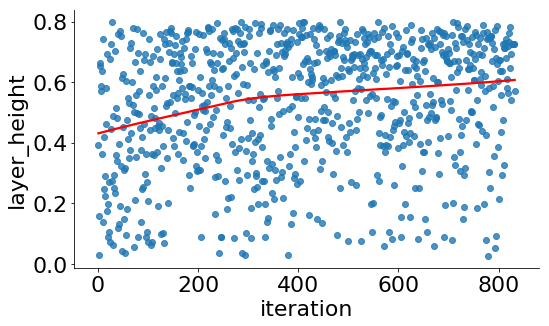

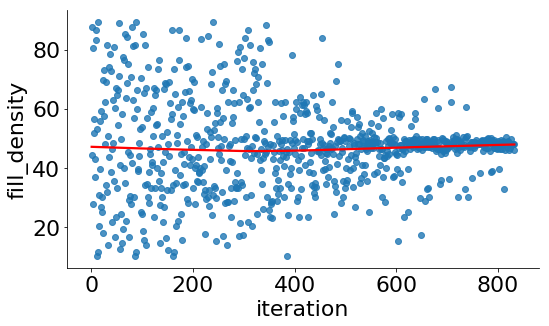

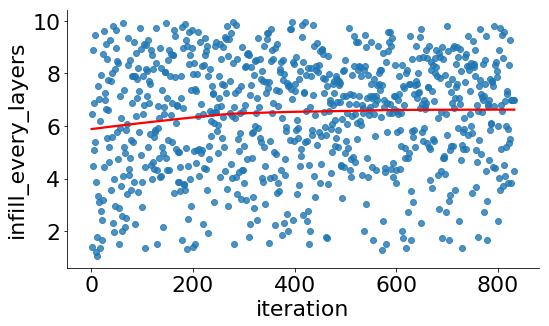

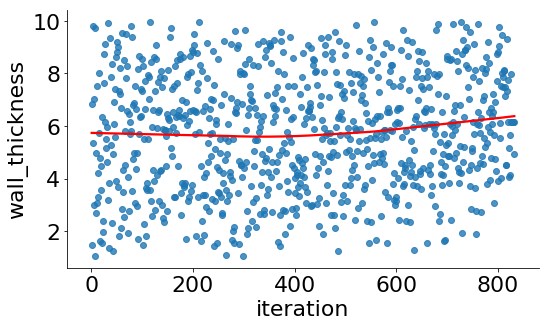

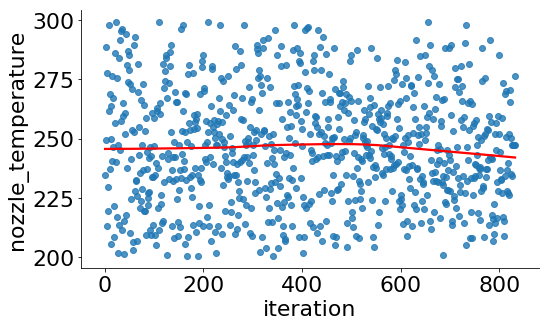

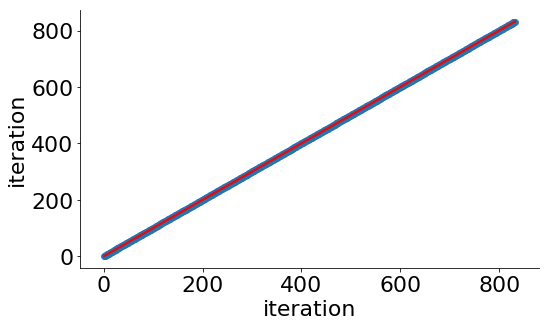

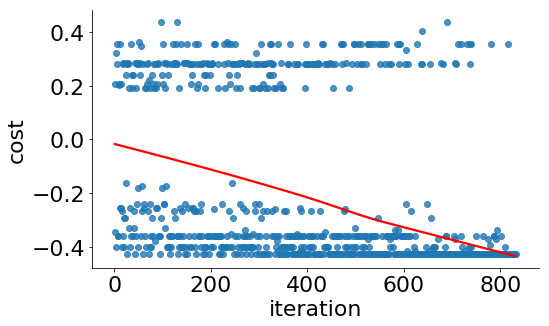

In [66]:

for column in evolution_df.columns:
  sns.lmplot(y=column,
             x='iteration',
             data=evolution_df,
             lowess=True,
             #scatter_kws={'color':'greys'},
             line_kws={'color':'r'},
             aspect=1.618
            )  

In [64]:
#sns.pairplot(evolution_df)
'--layer-height', # layer_height
'--fill-density', # infill_density
'--temperature', # nozzle_temperature
'--solid-layers' # wall_thickness

(0.02, 0.8), #layer_height
(10.0, 90.0), #fill_density
(1.0, 10.0), #infill_every_layers
(1.0, 10.0), #wall_thickness
(200, 300)  #nozzle_temperature

0.57153236
46.12917446
4.29097592
4.92265957
276.59808607

276.59808607

In [65]:
cost_function(np.array([0.57153236,
                       46.12917446,
                       4.29097592,
                       4.92265957,
                       276.59808607]
                      )
             )

array([-0.42831651])

In [54]:
%%sh
slic3r --layer-height 0.57153236 --fill-density 46.12917446 --infill-every-layers 4 --solid-layers 5 --temperature 277 --nozzle-diameter 0.6 '/home/thom/School/2019 S04 Spring/optimization_of_3d_printable_objects/stl_files/largecube.stl'

=> Processing triangulated mesh
=> Generating perimeters
=> Preparing infill
=> Infilling layers
=> Generating skirt
=> Exporting G-code to /home/thom/School/2019 S04 Spring/optimization_of_3d_printable_objects/stl_files/largecube.gcode
Done. Process took 0 minutes and 1.798 seconds
Filament required: 15777.7mm (111.5cm3)


In [55]:
metadata_enriched.to_csv('metadata_enriched.csv')